# Regras de associação - Case Pizzaria

## Importação das bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Importação do Dataset

In [2]:
df = pd.read_csv('pizzaria.csv')
df.head(10)

,data_pedido,hora_pedido,tipo_entrega,valor_borda,valor_refrigerante,valor_total,tempo
0,2011-10-07,18:45:00,Buscar,0.0,0.0,32.0,00:30:00
1,2011-10-07,18:47:00,Buscar,0.0,0.0,30.0,00:43:00
2,2011-10-07,18:49:00,Buscar,0.0,0.0,27.0,00:42:00
3,2011-10-07,18:50:00,Buscar,0.0,0.0,30.0,00:40:00
4,2011-10-07,18:52:00,Buscar,0.0,0.0,30.0,00:23:00
5,2011-10-07,18:57:00,Entrega,0.0,4.5,30.0,00:38:00
6,2011-10-07,18:59:00,Buscar,2.5,0.0,30.5,00:21:00
7,2011-10-07,20:00:00,Entrega,0.0,4.5,35.0,00:32:00
8,2011-10-07,20:05:00,Buscar,0.0,0.0,23.0,00:35:00
9,2011-10-07,20:10:00,Entrega,0.0,0.0,25.5,00:55:00


## Exploração do Dataset

In [3]:
df.dtypes

data_pedido            object
hora_pedido            object
tipo_entrega           object
valor_borda           float64
valor_refrigerante    float64
valor_total           float64
tempo                  object
dtype: object

In [4]:
df.describe()

,valor_borda,valor_refrigerante,valor_total
count,1000.000000,1000.000000,1000.000000
mean,0.276500,0.741000,28.183300
std,0.801524,1.692124,5.767485
min,0.000000,0.000000,10.000000
25%,0.000000,0.000000,23.500000
50%,0.000000,0.000000,29.000000
75%,0.000000,0.000000,32.500000
max,3.000000,9.000000,43.000000


In [5]:
df['data_pedido'].value_counts()

2011-11-18    50
2011-11-19    39
2011-11-26    38
2011-10-22    36
2011-11-16    35
2011-12-03    33
2011-11-12    29
2011-10-08    27
2011-12-02    25
2011-10-29    25
2011-10-28    24
2011-12-09    23
2011-12-04    23
2011-11-05    23
2011-10-07    23
2011-11-13    23
2011-10-15    22
2011-11-27    22
2011-12-10    20
2011-11-02    20
2011-10-30    20
2011-12-06    20
2011-12-07    18
2011-11-24    18
2011-11-04    18
2011-12-08    18
2011-11-20    18
2011-10-12    17
2011-11-25    16
2011-10-14    15
2011-10-21    15
2011-11-15    15
2011-10-23    15
2011-12-01    14
2011-10-27    14
2011-10-09    14
2011-11-11    14
2011-11-29    13
2011-11-01    13
2011-11-10    12
2011-10-20    11
2011-11-06    11
2011-11-22    10
2011-10-11    10
2011-10-25     8
2011-10-26     8
2011-11-08     8
2011-10-19     8
2011-11-03     8
2011-11-09     7
2011-11-17     7
2011-10-13     6
2011-11-23     6
2011-11-30     6
2011-10-18     5
2011-10-16     4
Name: data_pedido, dtype: int64

In [6]:
df.isnull().sum()

data_pedido           0
hora_pedido           0
tipo_entrega          0
valor_borda           0
valor_refrigerante    0
valor_total           0
tempo                 0
dtype: int64

## Formatando as variáveis

### Formatando 'data_pedido'

In [7]:
## Alterando o tipo de dado
df['data_pedido'] = df['data_pedido'].astype('datetime64')

In [8]:
## Criando uma coluna com o mes
df['mes'] = df['data_pedido'].dt.month
df.sample(3)

,data_pedido,hora_pedido,tipo_entrega,valor_borda,valor_refrigerante,valor_total,tempo,mes
367,2011-11-03,22:30:00,Buscar,0.0,0.0,30.00,00:25:00,11
320,2011-10-30,21:20:00,Buscar,0.0,0.0,30.00,00:40:00,10
157,2011-10-20,21:10:00,Entrega,0.0,4.5,28.25,00:31:00,10


In [9]:
## Criando uma coluna com o dia da semana
df['dia_semana'] = df['data_pedido'].dt.day_name()

## A funcao 'dt.day_name() retorna valores em ingles
## criado um dicionario para traduzir os valores
dia_da_semana_pt = {'Saturday' : 'sabado', 'Friday': 'sexta', 'Sunday' : 'domingo', 'Wednesday' : 'quarta',
                   'Thursday' : 'quinta', 'Tuesday' : 'terca'}

## Substitindo os valores em ingles pelo dict 'dia_da_semana_pt'
df['dia_semana'] = df['dia_semana'].map(dia_da_semana_pt)

## Avaliando uma amostra de dados
df.sample(5)

,data_pedido,hora_pedido,tipo_entrega,valor_borda,valor_refrigerante,valor_total,tempo,mes,dia_semana
802,2011-11-30,21:23:00,Buscar,0.0,0.0,31.0,00:33:00,11,quarta
119,2011-10-15,19:48:00,Entrega,0.0,0.0,25.5,00:37:00,10,sabado
678,2011-11-22,18:28:00,Entrega,0.0,0.0,25.5,00:32:00,11,terca
713,2011-11-25,19:51:00,Entrega,0.0,0.0,25.5,00:49:00,11,sexta
624,2011-11-19,19:20:00,Entrega,0.0,0.0,25.0,00:40:00,11,sabado


### Formatando a variável 'hora_pedido'

In [10]:
df['hora_pedido'].value_counts()

18:00:00    17
20:45:00    15
21:10:00    14
20:25:00    14
20:20:00    13
            ..
23:06:00     1
23:25:00     1
22:17:00     1
23:01:00     1
22:57:00     1
Name: hora_pedido, Length: 279, dtype: int64

In [11]:
## Analisando quais sao os horarios no dataframe

df['horario_pico'] = df['hora_pedido'].str.slice(start=0, stop = 2)
horarios_pico = df['horario_pico'].value_counts()

In [12]:
## horarios_pico.
horarios_pico = horarios_pico.reset_index()

## Ordenando os valores pelo numero de pedidos
horarios_pico.sort_values('horario_pico', ascending = False)

## 'rankiando' os horarios conforme a quantidade de pedidos
horarios_pico['rank'] = horarios_pico['horario_pico'].rank()

horarios_pico

,index,horario_pico,rank
0,20,315,6.0
1,21,241,5.0
2,19,166,4.0
3,22,130,3.0
4,18,101,2.0
5,23,47,1.0


In [13]:
## Separando entre "horarios de pico"
## maior quantidade de vendas == alto
## quantidade media == medio
## poucas vendas == baixo


## Com base no 'rank', criando os intervalos
condicoes = [
    (horarios_pico['rank'] > 4),
    (horarios_pico['rank'] > 2)]

## Criando os rótulos para as condicioes
rank = ['alto', 'medio']

## Concatenando as variaveis 'condicoes' e 'rank'
horarios_pico['rank2'] = np.select(condicoes, rank, default = 'baixo')

horarios_pico

,index,horario_pico,rank,rank2
0,20,315,6.0,alto
1,21,241,5.0,alto
2,19,166,4.0,medio
3,22,130,3.0,medio
4,18,101,2.0,baixo
5,23,47,1.0,baixo


In [14]:
## Selecionando apenas as colunas de horario e classificacao
horarios_pico = horarios_pico[['index', 'rank2']]

## Renomeando as colunas
horarios_pico.rename(columns={'index' : 'horario_pico', 'rank2' : 'interval_pico'}, inplace = True)

horarios_pico

,horario_pico,interval_pico
0,20,alto
1,21,alto
2,19,medio
3,22,medio
4,18,baixo
5,23,baixo


In [15]:
## Alterando o tipo de dado df
df['horario_pico'] = df['horario_pico'].astype('int64')

## Alterando o tipo de dado horarios_pico
horarios_pico['horario_pico'] = horarios_pico['horario_pico'].astype('int64')

In [16]:
## Fazendo merge dos horarios com as classificacoes 'baixo', 'medio' e 'alto'

df = pd.merge(df, horarios_pico,
                on = 'horario_pico',
                how = 'left')

In [17]:
df.sample(10)

,data_pedido,hora_pedido,tipo_entrega,valor_borda,valor_refrigerante,valor_total,tempo,mes,dia_semana,horario_pico,interval_pico
493,2011-11-13,19:25:00,Buscar,0.0,0.0,30.0,00:20:00,11,domingo,19,medio
686,2011-11-22,22:00:00,Entrega,0.0,4.5,27.0,00:40:00,11,terca,22,medio
140,2011-10-18,21:18:00,Buscar,0.0,0.0,30.0,00:35:00,10,terca,21,alto
995,2011-12-10,20:42:00,Buscar,0.0,5.0,37.0,00:53:00,12,sabado,20,alto
381,2011-11-04,21:47:00,Entrega,0.0,0.0,34.0,00:43:00,11,sexta,21,alto
0,2011-10-07,18:45:00,Buscar,0.0,0.0,32.0,00:30:00,10,sexta,18,baixo
672,2011-11-20,21:49:00,Buscar,0.0,0.0,30.0,00:31:00,11,domingo,21,alto
875,2011-12-03,22:56:00,Entrega,0.0,0.0,21.5,00:44:00,12,sabado,22,medio
165,2011-10-21,20:27:00,Entrega,0.0,4.5,35.5,00:43:00,10,sexta,20,alto
775,2011-11-27,20:38:00,Buscar,0.0,0.0,23.0,00:32:00,11,domingo,20,alto


### Formatando a variável 'tempo'

In [18]:
## extraindo somente os minutos
df['tempo_minutos'] = df['tempo'].str.slice(start = 3, stop = 5)

## Visualizando o dataframe
df.sample(6)

,data_pedido,hora_pedido,tipo_entrega,valor_borda,valor_refrigerante,valor_total,tempo,mes,dia_semana,horario_pico,interval_pico,tempo_minutos
685,2011-11-22,21:50:00,Buscar,2.5,0.0,29.5,00:16:00,11,terca,21,alto,16
372,2011-11-04,20:20:00,Entrega,0.0,4.5,29.5,00:40:00,11,sexta,20,alto,40
213,2011-10-23,18:45:00,Entrega,2.5,4.5,32.5,00:15:00,10,domingo,18,baixo,15
102,2011-10-14,19:52:00,Buscar,0.0,0.0,10.0,00:38:00,10,sexta,19,medio,38
847,2011-12-03,18:20:00,Buscar,0.0,4.5,26.5,00:40:00,12,sabado,18,baixo,40
338,2011-11-01,23:15:00,Buscar,0.0,4.5,17.5,00:26:00,11,terca,23,baixo,26


In [19]:
## Alterando o tipo de dado
df['tempo_minutos'].astype('int64')

## Inserindo a Series na variavel 'minutos'
minutos = df['tempo_minutos'].value_counts()

## Transformando em um DataFrame
minutos = pd.DataFrame(minutos)

## Fazendo reset do index
minutos = minutos.reset_index()

## Renomeando as colunas
minutos.rename(columns={'index' : 'tempo_minutos', 'tempo_minutos' : 'qtdade_pedidos'}, inplace = True)

## Alterando o tipo de dado
minutos['tempo_minutos'] = minutos['tempo_minutos'].astype('int64')

minutos

,tempo_minutos,qtdade_pedidos
0,40,70
1,50,59
2,35,59
3,45,53
4,30,42
5,42,41
6,39,35
7,43,34
8,47,33
9,33,32


In [20]:
## Descrevendo o dataset (criar os intervalos de horas)

minutos.describe()

,tempo_minutos,qtdade_pedidos
count,43.000000,43.000000
mean,33.953488,23.255814
std,12.635840,16.467996
min,12.000000,1.000000
25%,23.500000,10.000000
50%,34.000000,23.000000
75%,44.500000,31.000000
max,55.000000,70.000000


In [21]:
## Separado os minutos conforme os quartis
## criando as regras
condicoes2 = [
    (minutos['tempo_minutos'] < 24),
    (minutos['tempo_minutos'] >= 24) & (minutos['tempo_minutos'] <= 34),
    (minutos['tempo_minutos'] >= 35) & (minutos['tempo_minutos'] <= 44)]

## Criando os rótulos
rank2 = ['01 -- 23', '24 -- 34', '35 -- 44']

## Contenando as condicoes com os rótulos
minutos['rank_quartil'] = np.select(condicoes2, rank2, default = '> 45')

minutos

,tempo_minutos,qtdade_pedidos,rank_quartil
0,40,70,35 -- 44
1,50,59,> 45
2,35,59,35 -- 44
3,45,53,> 45
4,30,42,24 -- 34
5,42,41,35 -- 44
6,39,35,35 -- 44
7,43,34,35 -- 44
8,47,33,> 45
9,33,32,24 -- 34


In [22]:
## No DataFrame 'minutos', selecionando somente as colunas importantes
minutos = minutos[['tempo_minutos', 'rank_quartil']]

## Renomeando a coluna 'rank_quartil'
minutos.rename(columns={'rank_quartil' : 'intervalo_minutos'})

,tempo_minutos,intervalo_minutos
0,40,35 -- 44
1,50,> 45
2,35,35 -- 44
3,45,> 45
4,30,24 -- 34
5,42,35 -- 44
6,39,35 -- 44
7,43,35 -- 44
8,47,> 45
9,33,24 -- 34


In [23]:
## Fazendo merge dos horarios com as classificacoes 'baixo', 'medio' e 'alto'

df['tempo_minutos'] = df['tempo_minutos'].astype('int64')

df = pd.merge(df, minutos,
             on = 'tempo_minutos',
             how = 'left')

In [24]:
df.sample(6)

,data_pedido,hora_pedido,tipo_entrega,valor_borda,valor_refrigerante,valor_total,tempo,mes,dia_semana,horario_pico,interval_pico,tempo_minutos,rank_quartil
463,2011-11-12,18:10:00,Entrega,0.0,0.0,25.5,00:50:00,11,sabado,18,baixo,50,> 45
374,2011-11-04,20:23:00,Entrega,0.0,4.5,33.5,00:37:00,11,sexta,20,alto,37,35 -- 44
968,2011-12-09,20:53:00,Entrega,0.0,0.0,32.5,00:47:00,12,sexta,20,alto,47,> 45
33,2011-10-08,20:14:00,Entrega,0.0,0.0,25.5,00:36:00,10,sabado,20,alto,36,35 -- 44
360,2011-11-03,19:22:00,Buscar,0.0,4.0,30.0,00:38:00,11,quinta,19,medio,38,35 -- 44
60,2011-10-09,20:37:00,Buscar,2.5,0.0,24.5,00:47:00,10,domingo,20,alto,47,> 45


### Formatando as variaveis de valores (valor_borda, valor_refrigerante, valor_total)

In [25]:
## Verificando os tipos das variaveis
df.dtypes

data_pedido           datetime64[ns]
hora_pedido                   object
tipo_entrega                  object
valor_borda                  float64
valor_refrigerante           float64
valor_total                  float64
tempo                         object
mes                            int64
dia_semana                    object
horario_pico                   int64
interval_pico                 object
tempo_minutos                  int64
rank_quartil                  object
dtype: object

In [26]:
## explorando os valores
print(df['valor_borda'].value_counts())
print(df['valor_refrigerante'].value_counts())
print(df['valor_total'].value_counts())

0.0    893
2.5     89
3.0     18
Name: valor_borda, dtype: int64
0.0    834
4.5    114
4.0     35
5.0      9
2.0      3
8.5      3
2.5      1
9.0      1
Name: valor_refrigerante, dtype: int64
30.00    75
32.50    65
30.50    61
25.50    57
22.50    40
27.00    38
28.00    38
32.00    37
34.50    37
23.00    34
20.50    31
20.00    30
35.00    29
31.00    28
22.00    27
26.00    26
25.00    24
24.50    23
34.00    21
33.50    20
29.50    19
37.00    17
38.50    16
28.50    16
36.00    15
19.50    15
23.50    14
33.00    13
21.00    12
39.00    10
29.00    10
19.00     9
17.00     8
17.50     8
38.00     7
26.50     7
18.00     5
35.50     5
27.50     5
36.50     5
12.00     4
24.00     4
43.00     4
15.00     4
21.50     4
11.50     2
18.50     2
10.00     2
41.50     2
14.50     2
14.00     2
40.00     2
31.50     2
37.50     1
39.50     1
35.75     1
40.50     1
41.00     1
28.25     1
20.80     1
Name: valor_total, dtype: int64


In [27]:
## nota-se que o valor total é a soma das duas colunas: borda e refrigerante
## Criando uma coluna referente ao valor da pizza

df['valor_pizza'] = df['valor_total'] - (df['valor_borda'] + df['valor_refrigerante'])
df.sample(10)

,data_pedido,hora_pedido,tipo_entrega,valor_borda,valor_refrigerante,valor_total,tempo,mes,dia_semana,horario_pico,interval_pico,tempo_minutos,rank_quartil,valor_pizza
433,2011-11-09,21:12:00,Buscar,0.0,0.0,36.0,00:48:00,11,quarta,21,alto,48,> 45,36.0
853,2011-12-03,19:28:00,Entrega,0.0,0.0,19.5,00:32:00,12,sabado,19,medio,32,24 -- 34,19.5
408,2011-11-05,23:10:00,Buscar,0.0,4.5,23.5,00:30:00,11,sabado,23,baixo,30,24 -- 34,19.0
39,2011-10-08,20:58:00,Entrega,0.0,0.0,32.0,00:38:00,10,sabado,20,alto,38,35 -- 44,32.0
439,2011-11-10,20:45:00,Buscar,0.0,0.0,30.0,00:45:00,11,quinta,20,alto,45,> 45,30.0
222,2011-10-23,20:29:00,Entrega,0.0,0.0,33.0,00:55:00,10,domingo,20,alto,55,> 45,33.0
816,2011-12-01,21:26:00,Entrega,0.0,4.5,36.0,00:54:00,12,quinta,21,alto,54,> 45,31.5
886,2011-12-04,20:30:00,Buscar,0.0,0.0,20.0,00:49:00,12,domingo,20,alto,49,> 45,20.0
8,2011-10-07,20:05:00,Buscar,0.0,0.0,23.0,00:35:00,10,sexta,20,alto,35,35 -- 44,23.0
638,2011-11-19,20:38:00,Buscar,0.0,0.0,30.0,00:37:00,11,sabado,20,alto,37,35 -- 44,30.0


In [28]:
## Criando quartil de valor_total

## Criando a variavel valor_total (Series com cada um dos valores) // Resetando o indice
valor_total = df['valor_total'].value_counts().reset_index()

## Renomeando as colunas
valor_total.rename(columns={'index' : 'valor_total', 'valor_total' : 'qtdade'}, inplace = True)

## Alterando o tipo de dado
valor_total['valor_total'] = valor_total['valor_total'].astype('float64')

## Describe para identificar os quartis
valor_total.describe()

## Criando as regras para os intervalos
condicoes3 = [
    (valor_total['valor_total'] < 22),
    (valor_total['valor_total'] >= 22) & (valor_total['valor_total'] <= 28),
    (valor_total['valor_total'] >= 29) & (valor_total['valor_total'] <= 35)]

## Rotulos dos intervalos
rank3 = ['01 -- 21', '22 -- 28', '29 -- 35']

## Concatenando as regras dos intervalos e os rotulos
valor_total['rank_quartil_valor_total'] = np.select(condicoes3, rank3, default = '> 35')

## Selecionando somente as colunas importantes
valor_total = valor_total[['valor_total', 'rank_quartil_valor_total']]

## Fazendo merge dos horarios com as classificacoes 'baixo', 'medio' e 'alto'
df = pd.merge(df, valor_total,
             on = 'valor_total',
             how = 'left')

df.head(3)


,data_pedido,hora_pedido,tipo_entrega,valor_borda,valor_refrigerante,valor_total,tempo,mes,dia_semana,horario_pico,interval_pico,tempo_minutos,rank_quartil,valor_pizza,rank_quartil_valor_total
0,2011-10-07,18:45:00,Buscar,0.0,0.0,32.0,00:30:00,10,sexta,18,baixo,30,24 -- 34,32.0,29 -- 35
1,2011-10-07,18:47:00,Buscar,0.0,0.0,30.0,00:43:00,10,sexta,18,baixo,43,35 -- 44,30.0,29 -- 35
2,2011-10-07,18:49:00,Buscar,0.0,0.0,27.0,00:42:00,10,sexta,18,baixo,42,35 -- 44,27.0,22 -- 28


In [29]:
## Criando quartil de valor_pizza

## Criando a variavel valor_total (Series com cada um dos valores) // Resetando o indice
valor_total_pizza = df['valor_pizza'].value_counts().reset_index()

## Renomeando as colunas
valor_total_pizza.rename(columns={'index' : 'valor_pizza', 'valor_pizza' : 'qtdade'}, inplace = True)

## Alterando o tipo de dado
valor_total_pizza['valor_pizza'] = valor_total_pizza['valor_pizza'].astype('float64')

## Describe para identificar os quartis
valor_total_pizza.describe()

## Criando as regras para os intervalos
condicoes4 = [
    (valor_total_pizza['valor_pizza'] < 22),
    (valor_total_pizza['valor_pizza'] >= 22) & (valor_total_pizza['valor_pizza'] <= 26),
    (valor_total_pizza['valor_pizza'] >= 27) & (valor_total_pizza['valor_pizza'] <= 32)]

## Rotulos dos intervalos
rank4 = ['01 -- 21', '22 -- 26', '27 -- 32']

## Concatenando as regras dos intervalos e os rotulos
valor_total_pizza['rank_quartil_valor_total_pizza'] = np.select(condicoes4, rank4, default = '> 33')

## Selecionando somente as colunas importantes
valor_total_pizza = valor_total_pizza[['valor_pizza', 'rank_quartil_valor_total_pizza']]

## Fazendo merge dos horarios com as classificacoes 'baixo', 'medio' e 'alto'
df = pd.merge(df, valor_total_pizza,
             on = 'valor_pizza',
             how = 'left')

df.head(3)


,data_pedido,hora_pedido,tipo_entrega,valor_borda,valor_refrigerante,valor_total,tempo,mes,dia_semana,horario_pico,interval_pico,tempo_minutos,rank_quartil,valor_pizza,rank_quartil_valor_total,rank_quartil_valor_total_pizza
0,2011-10-07,18:45:00,Buscar,0.0,0.0,32.0,00:30:00,10,sexta,18,baixo,30,24 -- 34,32.0,29 -- 35,27 -- 32
1,2011-10-07,18:47:00,Buscar,0.0,0.0,30.0,00:43:00,10,sexta,18,baixo,43,35 -- 44,30.0,29 -- 35,27 -- 32
2,2011-10-07,18:49:00,Buscar,0.0,0.0,27.0,00:42:00,10,sexta,18,baixo,42,35 -- 44,27.0,22 -- 28,27 -- 32


In [30]:
## Criando a variavel valor_total (Series com cada um dos valores) // Resetando o indice
valor_total_pizza = df['valor_pizza'].value_counts().reset_index()

valor_total_pizza .describe()

,index,valor_pizza
count,54.000000,54.000000
mean,26.051852,18.518519
std,8.193439,20.619409
min,10.000000,1.000000
25%,20.125000,2.000000
50%,25.750000,11.500000
75%,32.375000,28.750000
max,41.000000,83.000000


In [31]:
## Verificado que no DataFrame haviam 3 valores = 0.00 / 2.50 / 3.00
## Substituido por S (sim) e N (nao)

df['valor_borda'].replace(3, 'S', inplace = True)
df['valor_borda'].replace(2.5, 'S', inplace = True)
df['valor_borda'].replace(0, 'N', inplace = True)

In [32]:
## Verificando se os valores estao corretos
df['valor_borda'].value_counts()

N    893
S    107
Name: valor_borda, dtype: int64

In [33]:
## Alterando os valores do refrigerante para S (sim) e N (nao)
df['valor_refrigerante'].replace('0', 'N', inplace = True)
df.loc[df.valor_refrigerante != 'N', 'valor_refrigerante'] = 'S'

In [34]:
## Confirmando se está correto
df['valor_refrigerante'].value_counts()

S    1000
Name: valor_refrigerante, dtype: int64

In [35]:
## Renomeado as colunas

df.rename(columns={'valor_borda' : 'borda', 'valor_refrigerante': 'refrigerante'})

,data_pedido,hora_pedido,tipo_entrega,borda,refrigerante,valor_total,tempo,mes,dia_semana,horario_pico,interval_pico,tempo_minutos,rank_quartil,valor_pizza,rank_quartil_valor_total,rank_quartil_valor_total_pizza
0,2011-10-07,18:45:00,Buscar,N,S,32.0,00:30:00,10,sexta,18,baixo,30,24 -- 34,32.0,29 -- 35,27 -- 32
1,2011-10-07,18:47:00,Buscar,N,S,30.0,00:43:00,10,sexta,18,baixo,43,35 -- 44,30.0,29 -- 35,27 -- 32
2,2011-10-07,18:49:00,Buscar,N,S,27.0,00:42:00,10,sexta,18,baixo,42,35 -- 44,27.0,22 -- 28,27 -- 32
3,2011-10-07,18:50:00,Buscar,N,S,30.0,00:40:00,10,sexta,18,baixo,40,35 -- 44,30.0,29 -- 35,27 -- 32
4,2011-10-07,18:52:00,Buscar,N,S,30.0,00:23:00,10,sexta,18,baixo,23,01 -- 23,30.0,29 -- 35,27 -- 32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2011-12-10,20:42:00,Buscar,N,S,37.0,00:53:00,12,sabado,20,alto,53,> 45,32.0,> 35,27 -- 32
996,2011-12-10,20:47:00,Buscar,S,S,33.0,00:43:00,12,sabado,20,alto,43,35 -- 44,30.0,29 -- 35,27 -- 32
997,2011-12-10,20:50:00,Entrega,N,S,31.0,00:50:00,12,sabado,20,alto,50,> 45,31.0,29 -- 35,27 -- 32
998,2011-12-10,21:05:00,Buscar,N,S,22.5,00:45:00,12,sabado,21,alto,45,> 45,18.0,22 -- 28,01 -- 21


## Visualização dos dados

### Analisando a correlacao

In [37]:
## Definindo variavel somente com os campos data_pedido e valor_total
total_por_data = df[['data_pedido', 'valor_total']]

## Agrupando por data_pedido e somando os valores
total_por_data.groupby(['data_pedido', 'valor_total']).sum()

## Agrupando por data_pedido, somando os valores e 'resetando' o indice
total_por_data = total_por_data.groupby('data_pedido').sum().reset_index()

## Definindo a variavel vendas por dia da semana
vendas_por_dia_semana = df[['dia_semana', 'valor_total']].groupby('dia_semana').sum().reset_index()

## Determinando a ordem dos dias da semana (para que o grafico seja plotado corretamente)
dia_semana = {'domingo' : 1, 'segunda' : 2, 'terca' : 3, 'quarta' : 4, 
              'quinta' : 5, 'sexta' : 6, 'sabado' : 7}

## Criando a coluna 'rank_dia_semana' com os dads da variavel 'da_semana'
## (para que o grafico seja plotado na ordem correta)
vendas_por_dia_semana['rank_dia_semana'] = vendas_por_dia_semana['dia_semana'].map(dia_semana)

## Criando a variavel com soma por mes
total_venda_mes = df[['mes', 'valor_total']].groupby('mes').sum().reset_index()
total_venda_mes

,mes,valor_total
0,10,8974.75
1,11,13672.05
2,12,5536.50


<Figure size 432x288 with 0 Axes>

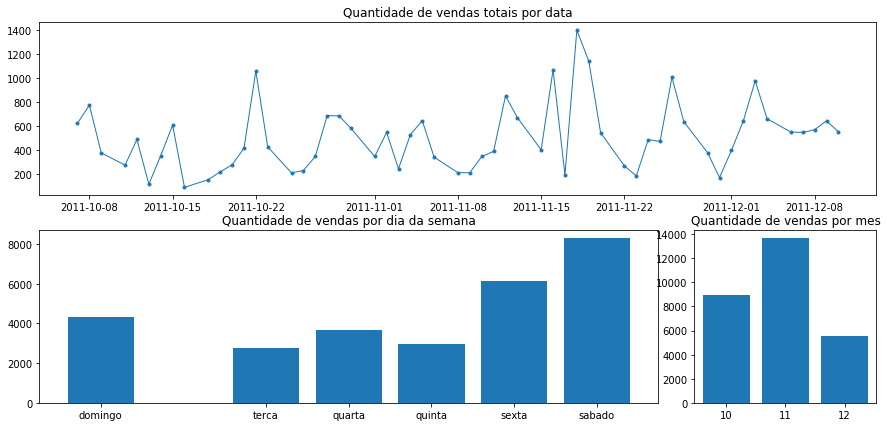

In [38]:
## Plotando o grafico
## Analise de vendas por datas

ax = plt.figure(constrained_layout=True)
ax = plt.figure(figsize=(15,7))

## Grafico de linhas
qt_graficos = ax.add_gridspec(2, 4)
grafico1 = ax.add_subplot(qt_graficos[0,:])
grafico1.set_title('Quantidade de vendas totais por data')
grafico1 = plt.plot(total_por_data['data_pedido'], total_por_data['valor_total'], lw = 1, marker = '.')

## Grafico de barras por dia da semana
grafico2 = ax.add_subplot(qt_graficos[1, :-1])
grafico2.set_title('Quantidade de vendas por dia da semana')
grafico2 = plt.bar(vendas_por_dia_semana['rank_dia_semana'], vendas_por_dia_semana['valor_total'],
                  tick_label = vendas_por_dia_semana['dia_semana'])

## Grafico de barras por mes
grafico3 = ax.add_subplot(qt_graficos[1:, -1])
grafico3.set_title('Quantidade de vendas por mes')
grafico3 = plt.bar(total_venda_mes['mes'], total_venda_mes['valor_total'],
                  tick_label = total_venda_mes['mes'])



## Treinando o modelo

### Importando biblioteca apriori

In [39]:
##pip install apyori

In [40]:
from apyori import apriori

In [50]:
## Selecionando somente as colunas importantes

ap = df[['tipo_entrega', 'dia_semana', 'interval_pico', 'rank_quartil', 
         'rank_quartil_valor_total', 'rank_quartil_valor_total_pizza']]

ap.rename(columns={'rank_quartil' : 'intervalo_tempo_entrega', 
                   'rank_quartil_valor_total' : 'intervalo_valor_total', 
                   'rank_quartil_valor_total_pizza' : 'intervalo_valor_pizza'})

,tipo_entrega,dia_semana,interval_pico,intervalo_tempo_entrega,intervalo_valor_total,intervalo_valor_pizza
0,Buscar,sexta,baixo,24 -- 34,29 -- 35,27 -- 32
1,Buscar,sexta,baixo,35 -- 44,29 -- 35,27 -- 32
2,Buscar,sexta,baixo,35 -- 44,22 -- 28,27 -- 32
3,Buscar,sexta,baixo,35 -- 44,29 -- 35,27 -- 32
4,Buscar,sexta,baixo,01 -- 23,29 -- 35,27 -- 32
...,...,...,...,...,...,...
995,Buscar,sabado,alto,> 45,> 35,27 -- 32
996,Buscar,sabado,alto,35 -- 44,29 -- 35,27 -- 32
997,Entrega,sabado,alto,> 45,29 -- 35,27 -- 32
998,Buscar,sabado,alto,> 45,22 -- 28,01 -- 21
